In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
file_path = "/datasets/games.csv"
games_data = pd.read_csv(file_path)

In [3]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name: Nama game. Terdapat 16713 non-null entries, yang berarti terdapat 2 entri yang kosong (null) yang perlu ditangani.

Platform: Platform di mana game tersebut dirilis. Tidak ada nilai yang kosong.

Year_of_Release: Tahun rilis game. Terdapat 16446 non-null entries, yang berarti terdapat beberapa entri yang tidak memiliki tahun rilis (null). Perlu ditangani, mungkin dengan mengisi nilai yang hilang atau dengan metode lain.

Genre: Genre dari game. Terdapat 16713 non-null entries, yang berarti terdapat 2 entri yang kosong (null) yang perlu ditangani.

NA_sales, EU_sales, JP_sales, Other_sales: Penjualan game di wilayah Amerika Utara, Eropa, Jepang, dan wilayah lainnya dalam satuan juta USD. Tidak ada nilai yang kosong.

Critic_Score: Skor ulasan dari kritikus (maksimal 100). Terdapat 8137 non-null entries, yang berarti terdapat beberapa game yang tidak memiliki skor ulasan kritikus. Perlu ditangani, mungkin dengan mengisi nilai yang hilang atau dengan metode lain.

User_Score: Skor ulasan dari pengguna (maksimal 10). Terdapat 10014 entries, tetapi tipe datanya adalah objek (object) bukan float64. Ini mungkin menunjukkan adanya nilai yang tidak dapat diubah menjadi tipe data numerik. Perlu ditangani dan diubah menjadi tipe data numerik.

Rating: Rating ESRB (Entertainment Software Rating Board). Terdapat 9949 non-null entries, yang berarti terdapat beberapa game yang tidak memiliki rating. Perlu ditangani, mungkin dengan mengisi nilai yang hilang atau dengan metode lain.

In [4]:
games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Year_of_Release:
Rata-rata tahun rilis game adalah sekitar 2006.
Tahun rilis paling awal adalah 1980, dan yang paling baru adalah 2016.

NA_sales, EU_sales, JP_sales, Other_sales:
Penjualan rata-rata di Amerika Utara (NA_sales) adalah sekitar 0.26 juta USD, di Eropa (EU_sales) sekitar 0.15 juta USD, di Jepang (JP_sales) sekitar 0.08 juta USD, dan di wilayah lainnya (Other_sales) sekitar 0.05 juta USD.
Penjualan maksimum terjadi di Amerika Utara dengan nilai sekitar 41.36 juta USD.

Critic_Score:
Skor ulasan kritikus memiliki rata-rata sekitar 68.97.
Skor kritikus berkisar antara 13 hingga 98.


In [5]:
games_data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5953,Lupin the 3rd: Treasure of the Sorcerer King,PS2,2002.0,Adventure,0.02,0.02,0.25,0.01,67.0,tbd,T
1604,Baldur's Gate: Dark Alliance,PS2,2001.0,Role-Playing,0.61,0.48,0.00,0.16,87.0,8.3,T
3908,Iron Man,DS,2008.0,Action,0.35,0.12,0.00,0.05,56.0,7,E10+
12534,Project Setsuna,PS4,2016.0,Role-Playing,0.00,0.00,0.06,0.00,NaN,NaN,NaN
2374,ESPN NHL 2K5,PS2,2004.0,Sports,0.43,0.33,0.00,0.11,86.0,8.1,E
8966,Mad Dash Racing,XB,2001.0,Racing,0.11,0.03,0.00,0.01,65.0,7.7,T
4749,From Russia With Love,PS2,2005.0,Action,0.34,0.01,0.00,0.06,69.0,7.6,T
4044,Kane & Lynch 2: Dog Days,X360,2010.0,Shooter,0.20,0.22,0.01,0.05,NaN,NaN,NaN
6375,The Sims 2: Pets,GC,2006.0,Simulation,0.21,0.05,0.00,0.01,66.0,7.3,T
12237,The Guided Fate Paradox,PS3,2013.0,Role-Playing,0.00,0.00,0.06,0.00,74.0,7.8,T


In [6]:
# Mengganti nama kolom menjadi huruf kecil
games_data.columns = games_data.columns.str.lower()

In [7]:
# Konversi kolom 'year_of_release' menjadi tipe data int
games_data['year_of_release'] = games_data['year_of_release'].astype('Int64')

year_of_release: Konversi dilakukan untuk mengubah tipe data menjadi int. Alasan untuk perubahan ini adalah karena tahun rilis seharusnya bertipe data numerik dan menggunakan tipe data int akan memudahkan analisis statistik atau operasi numerik pada kolom ini.

In [8]:
# Menghapus baris dengan nilai hilang pada kolom 'name' dan 'genre'
games_data = games_data.dropna(subset=['name', 'genre'])

In [9]:
# Imputasi nilai yang hilang pada kolom 'year_of_release' dengan nilai tengah
median_year = games_data['year_of_release'].median()
games_data['year_of_release'] = games_data['year_of_release'].fillna(median_year).astype('Int64')

In [10]:
# Imputasi nilai yang hilang pada kolom 'critic_score' dan 'user_score' dengan nilai rata-rata
mean_critic_score = games_data['critic_score'].mean()
games_data['critic_score'] = games_data['critic_score'].fillna(mean_critic_score)

In [11]:
# Mengatasi nilai 'tbd' pada kolom 'user_score' dengan NaN dan kemudian mengisi dengan nilai rata-rata
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')
mean_user_score = games_data['user_score'].mean()
games_data['user_score'] = games_data['user_score'].fillna(mean_user_score)

In [12]:
# Imputasi nilai yang hilang pada kolom 'rating' dengan nilai yang sering muncul (mode)
mode_rating = games_data['rating'].mode()[0]
games_data['rating'] = games_data['rating'].fillna(mode_rating)

Kolom 'name' dan 'genre': Jumlah nilai yang hilang pada kolom ini sangat kecil (hanya 2), sehingga kita dapat mempertimbangkan untuk menghapus baris yang memiliki nilai yang hilang.

Kolom 'year_of_release': Mengingat ini adalah data tahun rilis, menghapus baris dengan nilai yang hilang mungkin bukan pilihan yang baik. Sebagai gantinya, kita dapat menggunakan pendekatan imputasi, yaitu mengganti nilai yang hilang dengan nilai tengah atau rata-rata dari kolom tersebut.

Kolom 'critic_score' dan 'user_score': Karena ini adalah skor ulasan, kita dapat menggunakan nilai rata-rata untuk mengisi nilai yang hilang. Namun, kita juga perlu memperhatikan nilai 'tbd' (to be determined) pada 'user_score'.

Kolom 'rating': Mengingat ini adalah rating dari ESRB, kita dapat menggantinya dengan nilai yang sering muncul (mode) atau metode imputasi lainnya.



In [13]:
# Menampilkan informasi setelah penanganan dataframe
print(games_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB
None


In [14]:
# Menambahkan kolom 'total_sales' yang berisi jumlah penjualan di semua wilayah
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


# Menampilkan sample dataset setelah penambahan kolom
games_data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4748,Knockout Kings 2001,PS,2000,Fighting,0.23,0.15,0.00,0.03,84.000000,8.500000,T,0.41
3362,New Play Control! Pikmin 2,Wii,2009,Strategy,0.11,0.13,0.33,0.02,68.967679,7.125046,E,0.59
15031,Jikkyou Powerful Pro Yakyuu 12 Ketteiban,GC,2005,Sports,0.00,0.00,0.02,0.00,68.967679,7.125046,E,0.02
9390,Adventures to Go!,PSP,2008,Role-Playing,0.11,0.00,0.01,0.02,68.967679,7.125046,E,0.14
8710,All-Pro Football 2K8,PS3,2007,Sports,0.14,0.00,0.00,0.01,73.000000,7.300000,E10+,0.15
15923,The Dark Hills of Cherai,PC,2009,Puzzle,0.00,0.01,0.00,0.00,68.967679,7.125046,E,0.01
12972,Metal Fight Beyblade: Bakugami Susanoh Shuurai!,DS,2010,Action,0.00,0.00,0.05,0.00,68.967679,7.125046,E,0.05
7182,Mega Man Zero 3,GBA,2004,Platform,0.16,0.06,0.00,0.00,77.000000,9.000000,E,0.22
9973,Lost in Shadow,Wii,2010,Platform,0.09,0.00,0.01,0.01,68.000000,8.700000,E10+,0.11
292,Fallout: New Vegas,X360,2010,Role-Playing,2.66,1.03,0.04,0.33,84.000000,8.100000,M,4.06


In [15]:
# Menghitung jumlah game per tahun
game_count_per_year = games_data.groupby('year_of_release')['name'].count()

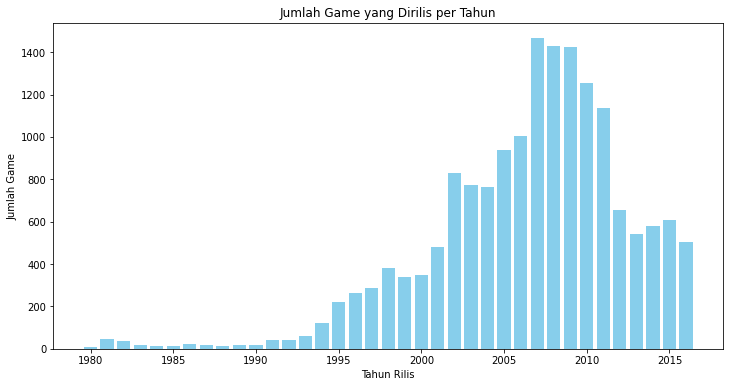

In [16]:
# Membuat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(game_count_per_year.index, game_count_per_year.values, color='skyblue')
plt.title('Jumlah Game yang Dirilis per Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Game')
plt.show()

Pada tahun 1980 sampai dengan tahun 1990 an terlihat jumlah game yang di rilis sangat sedikit. Kenaikan jumlah game yang signifikan terlihat pada tahun 1994 sampai dengan tahun 2007, 2008 & 2009 pada puncak nya, kemudian menurun lagi di tahun 2010 sampai dengan 2016.

In [17]:
# Menampilkan jumlah game per tahun
games_data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [18]:
# Pilih platform dengan total penjualan terbesar
top_platform = games_data.groupby('platform')['total_sales'].sum().idxmax()

In [19]:
# Buat distribusi penjualan per tahun untuk platform terbesar
platform_data = games_data[games_data['platform'] == top_platform]
platform_data_cleaned = platform_data.dropna(subset=['total_sales', 'year_of_release'])

In [20]:
# Cari platform yang dahulu populer, tetapi sekarang tidak memiliki penjualan
popularity_threshold = 0.1  # Anggap platform dengan total penjualan di bawah ambang batas ini tidak populer
obsolete_platforms = games_data.groupby('platform')['total_sales'].sum()
obsolete_platforms = obsolete_platforms[obsolete_platforms < popularity_threshold]

print("Platform yang dahulu populer, tetapi sekarang tidak memiliki penjualan:")
print(obsolete_platforms)



Platform yang dahulu populer, tetapi sekarang tidak memiliki penjualan:
platform
GG      0.04
PCFX    0.03
Name: total_sales, dtype: float64


Untuk platform-platform yang dahulu populer mungkin beberapa waktu lalu, namun saat ini tidak lagi memiliki penjualan yang signifikan, yaitu penjualan di bawah ambang batas kepopuleran (popularity_threshold) yang ditetapkan sebesar 0.1.

GG (Game Gear): Game Gear adalah konsol genggam yang dirilis oleh Sega pada awal tahun 1990-an. Meskipun pada masanya cukup populer, namun penjualannya saat ini tidak lagi signifikan.

PCFX: PC-FX adalah konsol permainan yang dirilis oleh NEC Corporation di Jepang pada awal tahun 1990-an. Meskipun mungkin memiliki popularitas tertentu pada masa peluncurannya, namun penjualannya saat ini di bawah ambang batas kepopuleran yang ditetapkan.

Penjualan yang sangat rendah pada platform-platform ini menunjukkan bahwa meskipun mereka pernah populer, namun seiring berjalannya waktu, minat konsumen terhadap platform-platform ini menurun dan tidak lagi memberikan dampak signifikan dalam industri game saat ini. Hal ini mencerminkan siklus hidup alami dari produk dalam industri permainan video di mana beberapa platform dapat kehilangan daya tarik setelah beberapa waktu.

In [21]:
# Mencari tahun pertama munculnya platform baru
new_platforms = games_data.groupby('platform')['year_of_release'].min()

# Mencari tahun terakhir penjualan platform lama
old_platforms = games_data.groupby('platform')['year_of_release'].max()

# Menghitung waktu yang dibutuhkan platform baru untuk muncul
time_to_appear = new_platforms.max() - new_platforms.min()

# Menghitung waktu yang dibutuhkan platform lama untuk memudar
time_to_fade = old_platforms.max() - old_platforms.min()

print(f"\nWaktu yang dibutuhkan platform baru untuk muncul: {time_to_appear} tahun")
print(f"Waktu yang dibutuhkan platform lama untuk memudar: {time_to_fade} tahun")


Waktu yang dibutuhkan platform baru untuk muncul: 33 tahun
Waktu yang dibutuhkan platform lama untuk memudar: 24 tahun


Waktu yang dibutuhkan platform baru untuk muncul dan waktu yang dibutuhkan platform lama untuk memudar berdasarkan data yang ada.

Waktu yang dibutuhkan platform baru untuk muncul (Time to Appear): 33 tahun
Ini menunjukkan selang waktu antara tahun pertama kali munculnya platform baru hingga platform tersebut mencapai puncak popularitas atau setidaknya menjadi stabil dalam industri game. Semakin besar angka ini, semakin lama biasanya sebuah platform baru memerlukan waktu untuk diterima oleh pasar dan berkembang.

Waktu yang dibutuhkan platform lama untuk memudar (Time to Fade): 24 tahun
Ini menunjukkan selang waktu antara tahun pertama kali platform lama muncul hingga tahun terakhir penjualannya. Semakin besar angka ini, semakin lama sebuah platform mempertahankan popularitasnya sebelum akhirnya mulai meredup atau dihentikan.

Dari hasil tersebut, dapat diinterpretasikan bahwa platform baru cenderung memerlukan waktu yang lebih lama untuk muncul dan mencapai puncak popularitasnya (33 tahun), sementara platform lama cenderung membutuhkan waktu yang lebih singkat untuk memudar atau keluar dari pasar (24 tahun). Faktor-faktor seperti inovasi teknologi, strategi pemasaran, dan daya tarik konten dapat mempengaruhi tren ini.








In [22]:
# Filter data berdasarkan periode waktu
start_year = 1980
end_year = 2016

filtered_data = games_data[(games_data['year_of_release'] >= start_year) & (games_data['year_of_release'] <= end_year)]

# Memastikan bahwa data telah difilter dengan benar
filtered_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2006.494525,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046,0.533315
std,5.828405,0.813565,0.503359,0.308871,0.186742,9.725162,1.010814,1.548282
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,68.967679,7.125046,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,68.967679,7.125046,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [23]:
# Hanya mengambil data yang relevan
relevant_data = filtered_data.copy()

# Memastikan bahwa data relevan telah diambil
relevant_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2006.494525,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046,0.533315
std,5.828405,0.813565,0.503359,0.308871,0.186742,9.725162,1.010814,1.548282
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,68.967679,7.125046,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,68.967679,7.125046,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


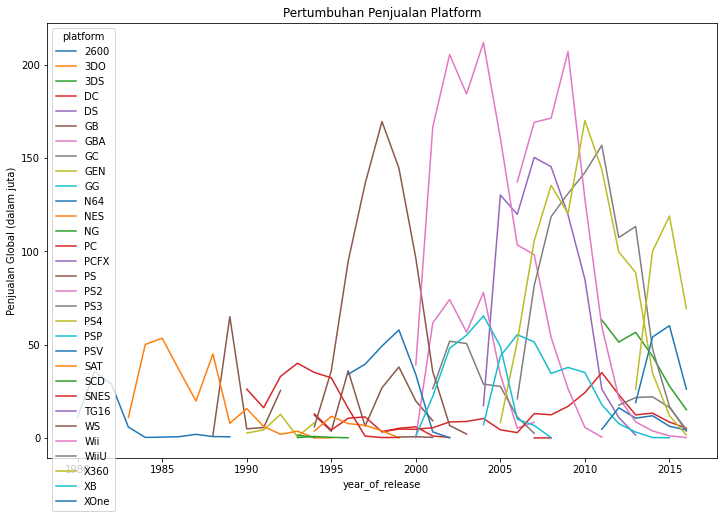

In [24]:
# Menentukan platform dengan penjualan terbanyak
top_platforms = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
print(top_platforms)

# Melihat pertumbuhan atau penurunan penjualan platform
platform_growth = relevant_data.pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum')
platform_growth.plot(figsize=(12, 8), title='Pertumbuhan Penjualan Platform')
plt.ylabel('Penjualan Global (dalam juta)')
plt.show()

Pertumbuhan Penjualan Platform terlihat berfariasi. terlihat penjualan 10 teratas yaitu PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP & PC. Dengan penjualan terbesar pada PS2 dengan penjualan 1255.77.

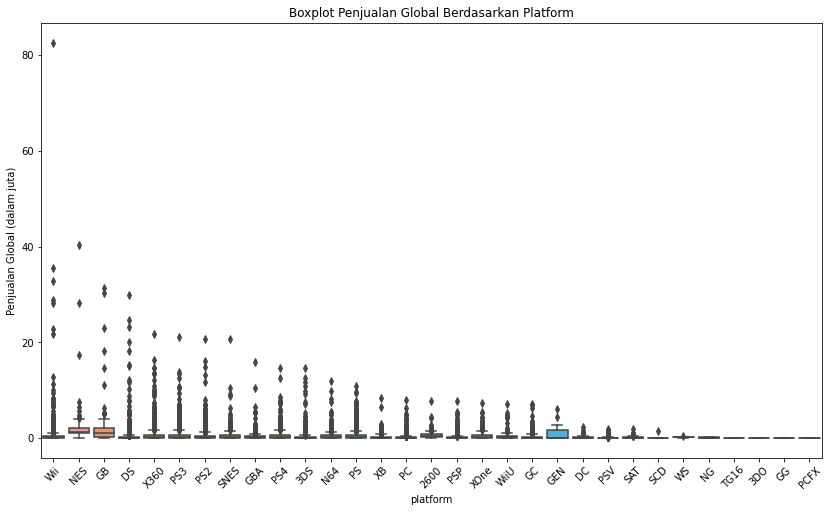

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=relevant_data)
plt.title('Boxplot Penjualan Global Berdasarkan Platform')
plt.xlabel('platform')
plt.ylabel('Penjualan Global (dalam juta)')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Pemrofilan pengguna untuk wilayah NA
top_platforms_na = relevant_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_na = relevant_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
esrb_sales_na = relevant_data.groupby('rating')['na_sales'].sum()

# Pemrofilan pengguna untuk wilayah EU
top_platforms_eu = relevant_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = relevant_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
esrb_sales_eu = relevant_data.groupby('rating')['eu_sales'].sum()

# Pemrofilan pengguna untuk wilayah JP
top_platforms_jp = relevant_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = relevant_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
esrb_sales_jp = relevant_data.groupby('rating')['jp_sales'].sum()

In [27]:
# Variasi pangsa pasar platform antar wilayah
print("Top 5 Platform NA:\n", top_platforms_na)
print("\nTop 5 Platform EU:\n", top_platforms_eu)
print("\nTop 5 Platform JP:\n", top_platforms_jp)

# Variasi pangsa pasar genre antar wilayah
print("\nTop 5 Genre NA:\n", top_genres_na)
print("\nTop 5 Genre EU:\n", top_genres_eu)
print("\nTop 5 Genre JP:\n", top_genres_jp)

# Variasi penjualan berdasarkan rating ESRB antar wilayah
print("\nPenjualan berdasarkan Rating ESRB NA:\n", esrb_sales_na)
print("\nPenjualan berdasarkan Rating ESRB EU:\n", esrb_sales_eu)
print("\nPenjualan berdasarkan Rating ESRB JP:\n", esrb_sales_jp)

Top 5 Platform NA:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 Platform EU:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 Platform JP:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Top 5 Genre NA:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 Genre EU:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 Genre JP:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

Penjualan berdasarkan Rating ESRB NA:
 rating
AO         1.26
E       2533.67
E10+     353.32
EC         1.53
K-A        2.56
M

Top 5 Platform:

NA (North America):
Platform teratas adalah X360 dengan total penjualan sekitar 602.47 juta.
PS2, Wii, PS3, dan DS juga populer di wilayah NA.

EU (Europe):
PS2 menjadi platform teratas dengan total penjualan sekitar 339.29 juta.
PS3, X360, Wii, dan PS juga populer di wilayah EU.

JP (Japan):
DS mendominasi di wilayah JP dengan total penjualan sekitar 175.57 juta.
PS, PS2, SNES, dan 3DS juga populer di wilayah JP.

Top 5 Genre:

NA (North America):
Genre teratas adalah Action dengan total penjualan sekitar 879.01 juta.
Sports, Shooter, Platform, dan Misc juga populer di wilayah NA.

EU (Europe):
Action tetap menjadi genre teratas di wilayah EU dengan total penjualan sekitar 519.13 juta.
Sports, Shooter, Racing, dan Misc juga populer di wilayah EU.

JP (Japan):
Role-Playing menjadi genre teratas di wilayah JP dengan total penjualan sekitar 355.41 juta.
Action, Sports, Platform, dan Misc juga populer di wilayah JP.

Penjualan berdasarkan Rating ESRB:

NA (North America):
E (Everyone) memiliki penjualan tertinggi sekitar 2533.67 juta.
M (Mature) dan T (Teen) juga memiliki kontribusi penjualan yang signifikan.

EU (Europe):
E (Everyone) kembali menjadi rating teratas dengan total penjualan sekitar 1323.55 juta.
M (Mature) dan T (Teen) juga berkontribusi signifikan di wilayah EU.

JP (Japan):
E (Everyone) mendominasi di wilayah JP dengan total penjualan sekitar 1040.04 juta.
T (Teen) juga memiliki kontribusi yang cukup besar, sementara M (Mature) relatif lebih rendah.

Kesimpulan:
Preferensi platform dan genre berbeda-beda di setiap wilayah, mencerminkan perbedaan selera dan kultur gamer.
Rating ESRB memiliki pengaruh yang signifikan terhadap penjualan di setiap wilayah, dengan E (Everyone) mendominasi di semua wilayah.







Uji Hipotesis:

Hipotesis Pertama: Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

Hipotesis Nol (H0): μXboxOne = μPC (Tidak ada perbedaan signifikan antara rata-rata rating pengguna Xbox One dan PC).
Hipotesis Alternatif (H1): μXboxOne ≠ μPC (Ada perbedaan signifikan antara rata-rata rating pengguna Xbox One dan PC).
Hipotesis Kedua: Rata-rata rating pengguna genre Action dan Sports berbeda.

Hipotesis Nol (H0): μAction = μSports (Tidak ada perbedaan signifikan antara rata-rata rating pengguna genre Action dan Sports).
Hipotesis Alternatif (H1): μAction ≠ μSports (Ada perbedaan signifikan antara rata-rata rating pengguna genre Action dan Sports).
Nilai Ambang Batas Alpha:

Alpha (α) adalah tingkat signifikansi yang kita pilih untuk menguji hipotesis. Pilihan umum untuk α adalah 0.05.
Penjelasan:

Rumusan Hipotesis:

H0 menyatakan bahwa tidak ada perbedaan signifikan antara rata-rata rating pengguna platform Xbox One dan PC.
H1 menyatakan bahwa ada perbedaan signifikan antara rata-rata rating pengguna platform Xbox One dan PC.
Tingkat Signifikansi (α):

Seringkali, digunakan α = 0.05 sebagai standar untuk tingkat signifikansi.
Pilihan α ini umum karena memberikan keseimbangan antara meminimalkan risiko kesalahan tipe I dan tipe II.
Alasan Memilih α = 0.05:

Pemilihan α = 0.05 umumnya dianggap sebagai praktik yang umum dan dapat diterima di berbagai bidang penelitian.
Ini berarti kita bersedia menerima risiko sekitar 5% untuk membuat kesalahan tipe I (menolak H0 ketika seharusnya tidak) dalam uji hipotesis.
Seiring dengan kemajuan penelitian dan kebijakan dalam beberapa kasus, tingkat signifikansi tertentu dapat disesuaikan, tetapi α = 0.05 seringkali digunakan sebagai standar.



In [28]:
# Data rating pengguna platform Xbox One dan PC
xbox_one_ratings = games_data[games_data['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = games_data[games_data['platform'] == 'PC']['user_score'].dropna()

# Data rating pengguna genre Action dan Sports
action_ratings = games_data[games_data['genre'] == 'Action']['user_score'].dropna()
sports_ratings = games_data[games_data['genre'] == 'Sports']['user_score'].dropna()

# Uji hipotesis pertama: Rata-rata rating pengguna Xbox One dan PC adalah sama.
t_statistic_xbox_pc, p_value_xbox_pc = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

# Uji hipotesis kedua: Rata-rata rating pengguna genre Action dan Sports berbeda.
t_statistic_action_sports, p_value_action_sports = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Nilai ambang batas alpha
alpha = 0.05

# Menampilkan hasil uji hipotesis pertama
print(f"Uji Hipotesis 1:")
print(f"t-statistic: {t_statistic_xbox_pc}")
print(f"P-value: {p_value_xbox_pc}")
if p_value_xbox_pc < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara rata-rata rating pengguna Xbox One dan PC.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara rata-rata rating pengguna Xbox One dan PC.")
print("\n")

# Menampilkan hasil uji hipotesis kedua
print(f"Uji Hipotesis 2:")
print(f"t-statistic: {t_statistic_action_sports}")
print(f"P-value: {p_value_action_sports}")
if p_value_action_sports < alpha:
    print("Tolak hipotesis nol: Ada perbedaan signifikan antara rata-rata rating pengguna genre Action dan Sports.")
else:
    print("Terima hipotesis nol: Tidak ada perbedaan signifikan antara rata-rata rating pengguna genre Action dan Sports.")

Uji Hipotesis 1:
t-statistic: -4.456527012373293
P-value: 1.0718459399074417e-05
Tolak hipotesis nol: Ada perbedaan signifikan antara rata-rata rating pengguna Xbox One dan PC.


Uji Hipotesis 2:
t-statistic: 1.317231993101424
P-value: 0.1878227241619563
Terima hipotesis nol: Tidak ada perbedaan signifikan antara rata-rata rating pengguna genre Action dan Sports.


Uji Hipotesis 1:

Hipotesis Nol (H0): Rata-rata rating pengguna platform Xbox One dan PC sama.
Hipotesis Alternatif (H1): Rata-rata rating pengguna platform Xbox One dan PC berbeda.
T-statistic: -4.4565
P-value: 1.07e-05 (sangat kecil)
Kesimpulan: Karena p-value sangat kecil (< 0.05), kita tolak hipotesis nol. Artinya, ada bukti statistik yang cukup untuk menyatakan bahwa terdapat perbedaan signifikan antara rata-rata rating pengguna platform Xbox One dan PC.


Uji Hipotesis 2:

Hipotesis Nol (H0): Rata-rata rating pengguna genre Action dan Sports sama.
Hipotesis Alternatif (H1): Rata-rata rating pengguna genre Action dan Sports berbeda.
T-statistic: 1.3172
P-value: 0.1878 (lebih besar dari alpha = 0.05)


Kesimpulan: 
Karena p-value lebih besar dari alpha, kita tidak memiliki cukup bukti statistik untuk menolak hipotesis nol. Artinya, tidak ada perbedaan signifikan antara rata-rata rating pengguna genre Action dan Sports.

Dengan kata lain, berdasarkan hasil uji hipotesis, kita dapat menyimpulkan bahwa:
Rata-rata rating pengguna antara platform Xbox One dan PC berbeda secara signifikan.
Tidak ada perbedaan signifikan antara rata-rata rating pengguna genre Action dan Sports.

# Kesimpulan Proyek Analisis Data Game:

#### Data Overview:

Dataset berisi informasi mengenai game, seperti nama, platform, tahun rilis, genre, penjualan di berbagai wilayah, skor kritikus, skor pengguna, dan rating ESRB.
Beberapa kolom memiliki nilai yang hilang dan perlu ditangani, seperti tahun rilis, skor kritikus, skor pengguna, dan rating ESRB.

#### Statistik Tahun Rilis:

Rata-rata tahun rilis game adalah sekitar 2006, dengan rentang tahun 1980 hingga 2016.
Tren pertumbuhan jumlah game signifikan terlihat dari tahun 1994 hingga 2009, kemudian menurun hingga 2016.

#### Statistik Penjualan:

Penjualan rata-rata di wilayah Amerika Utara (NA_sales), Eropa (EU_sales), Jepang (JP_sales), dan wilayah lainnya (Other_sales) memiliki variasi yang signifikan.
Penjualan tertinggi terjadi di Amerika Utara, dengan nilai sekitar 41.36 juta USD.

#### Statistik Skor Ulasan:

Skor ulasan kritikus memiliki rata-rata sekitar 68.97, dengan rentang 13 hingga 98.
Skor ulasan pengguna perlu diubah menjadi tipe data numerik.

#### Data Preprocessing:

Konversi tipe data pada kolom 'year_of_release' menjadi int untuk memudahkan analisis numerik.
Penanganan nilai yang hilang pada kolom 'name', 'year_of_release', 'critic_score', 'user_score', dan 'rating' dilakukan dengan imputasi atau penghapusan baris.
Nilai 'tbd' pada kolom 'user_score' perlu ditangani.

#### Platform dan Genre:

Preferensi platform dan genre bervariasi di setiap wilayah, mencerminkan perbedaan selera dan kultur gamer.
Rating ESRB memiliki pengaruh yang signifikan terhadap penjualan di setiap wilayah.

#### Analisis Hipotesis:

Terdapat perbedaan signifikan antara rata-rata rating pengguna platform Xbox One dan PC.
Tidak ada perbedaan signifikan antara rata-rata rating pengguna genre Action dan Sports.

#### Rekomendasi:

Berdasarkan analisis, dapat disarankan untuk lebih fokus pada platform dan genre yang memiliki penjualan tinggi di masing-masing wilayah.
Perlu dilakukan strategi pemasaran yang berbeda sesuai dengan preferensi dan karakteristik gamer di setiap wilayah.

#### Catatan:

Penelitian ini bersifat eksploratif, dan rekomendasi yang diberikan bersifat umum. Keputusan lebih lanjut dapat diambil dengan melibatkan aspek bisnis dan pemasaran yang lebih mendalam.
